In [81]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 1.6 MB/s eta 0:01:18
   ---------------------------------------- 1.0/124.9 MB 1.6 MB/s eta 0:01:17
    --------------------------------------- 1.6/124.9 MB 1.9 MB/s eta 0:01:07
    --------------------------------------- 2.1/124.9 MB 1.9 MB/s eta 0:01:04
    --------------------------------------- 2.6/124.9 MB 2.1 MB/s eta 0:00:59
   - -------------------------------------- 3.4/124.9 MB 2.3 MB/s eta 0:00:54
   - -------------------------------------- 4.2/124.9 MB 2.5 MB/s eta 0:00:49
   - -------------------------------------- 5.0/124.9 MB 2.6 MB/s eta 0:00:46
   - -------------------------------------- 5.8/124.9 MB 2.8 MB/s eta 0:00:43
   -- -


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\shobh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [83]:
df=pd.read_csv("data.csv")

In [85]:
df

,invoice_date,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,...,month,quarter,year,gender_encoded,category_encoded,payment_method_encoded,quantity_scaled,price_scaled,total_sales_scaled,age_group
0,2021-12-12,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,...,12,4,2021,1,4,2,-0.002426,1.180703,0.680349,19-25
1,2021-11-09,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,...,11,4,2021,1,1,0,-1.417837,-0.413498,-0.527823,19-25
2,2021-10-24,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,...,10,4,2021,0,0,0,0.705279,-0.667945,-0.541483,46-60
3,2022-03-13,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,Istinye Park,...,3,1,2022,0,2,0,-1.417837,-0.689131,-0.589261,46-60
4,2021-01-13,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,Mall of Istanbul,...,1,1,2021,0,1,1,-0.710132,-0.094665,-0.314620,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85466,2021-10-09,I675411,C513603,Male,50,Toys,5,179.20,Cash,Metropol AVM,...,10,4,2021,1,7,0,1.412984,-0.541933,-0.386692,46-60
85467,2022-09-21,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,...,9,3,2022,0,5,1,1.412984,-0.670017,-0.529441,36-45
85468,2021-09-22,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,...,9,3,2021,1,3,0,-0.710132,-0.721219,-0.593936,26-35
85469,2021-03-28,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity,...,3,1,2021,1,3,2,-0.710132,-0.721219,-0.593936,Above 60


In [86]:
df.set_index('invoice_date', inplace=True)

In [87]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,total_sales,...,month,quarter,year,gender_encoded,category_encoded,payment_method_encoded,quantity_scaled,price_scaled,total_sales_scaled,age_group
invoice_date,,,,,,,,,,,,,,,,,,,,,
2021-12-12,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,5401.53,...,12,4,2021,1,4,2,-0.002426,1.180703,0.680349,19-25
2021-11-09,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,300.08,...,11,4,2021,1,1,0,-1.417837,-0.413498,-0.527823,19-25
2021-10-24,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,242.40,...,10,4,2021,0,0,0,0.705279,-0.667945,-0.541483,46-60
2022-03-13,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,Istinye Park,40.66,...,3,1,2022,0,2,0,-1.417837,-0.689131,-0.589261,46-60
2021-01-13,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,Mall of Istanbul,1200.32,...,1,1,2021,0,1,1,-0.710132,-0.094665,-0.314620,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-09,I675411,C513603,Male,50,Toys,5,179.20,Cash,Metropol AVM,896.00,...,10,4,2021,1,7,0,1.412984,-0.541933,-0.386692,46-60
2022-09-21,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,293.25,...,9,3,2022,0,5,1,1.412984,-0.670017,-0.529441,36-45
2021-09-22,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,20.92,...,9,3,2021,1,3,0,-0.710132,-0.721219,-0.593936,26-35


In [88]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'shopping_mall', 'total_sales',
       'day_of_week', 'month', 'quarter', 'year', 'gender_encoded',
       'category_encoded', 'payment_method_encoded', 'quantity_scaled',
       'price_scaled', 'total_sales_scaled', 'age_group'],
      dtype='object')

In [89]:
df.index = pd.to_datetime(df.index, errors='coerce')


In [90]:
print(df['total_sales'].describe())

count    85471.000000
mean      1137.152475
std       1552.912965
min          5.230000
25%        105.570000
50%        365.940000
75%       1200.320000
max       5401.530000
Name: total_sales, dtype: float64


In [91]:
print(df['total_sales'].isna().sum())

0


In [92]:
# Select features and target
features = [
    "age", "gender_encoded", "category_encoded", "payment_method_encoded",
    "quantity_scaled", "price_scaled", "total_sales_scaled"
]  # Replace with relevant features in your dataset
target = "total_sales"

In [93]:
X = df[features]
y = df[target]


In [94]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
# Standardize features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
}

In [97]:
# Train models and calculate metrics
results = {}


In [98]:
for model_name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R^2": r2
    }

In [99]:
# Print results
results_df = pd.DataFrame(results).T
print(results_df)


                            MAE           MSE          RMSE  R^2
Linear Regression  2.995051e-12  1.722377e-23  4.150153e-12  1.0
Random Forest      1.078092e-11  5.947614e-22  2.438773e-11  1.0
XGBoost            3.180427e-02  1.758639e-03  4.193613e-02  1.0


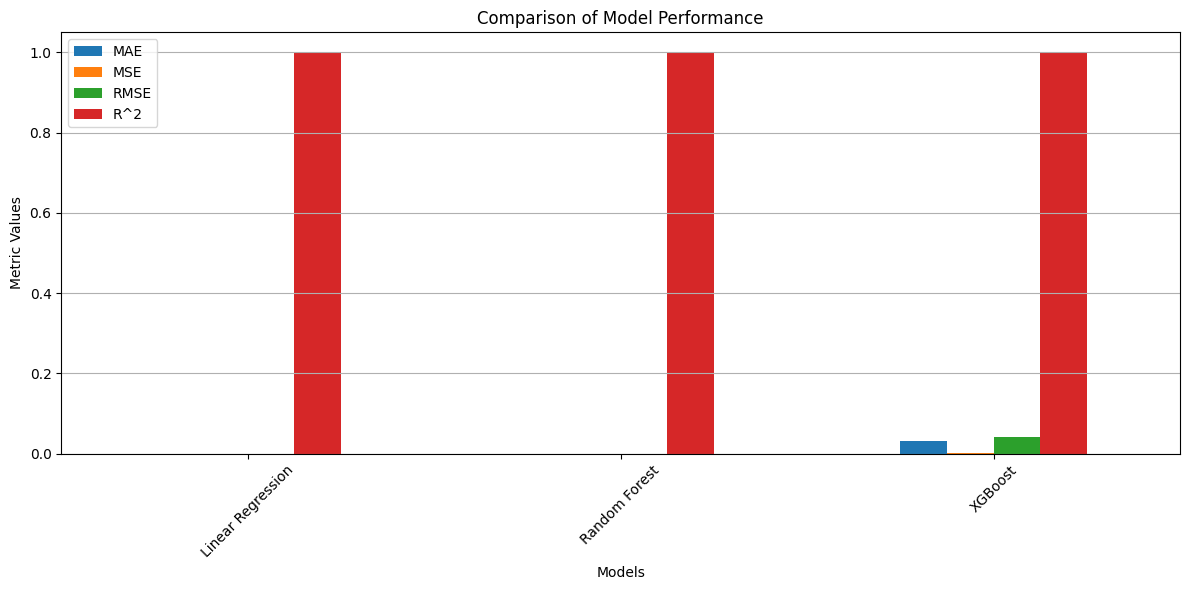

In [100]:
# Visualization of metrics comparison
import matplotlib.pyplot as plt

results_df.plot(kind="bar", figsize=(12, 6))
plt.title("Comparison of Model Performance")
plt.ylabel("Metric Values")
plt.xlabel("Models")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()